# Classification Challange

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

In [2]:
import pandas as pd

# Memuat Himpunan data latih 
grape_variety = pd.read_csv('data/wine.csv')
grape_variety.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
# Memisahkan fitur dan label
features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_315_of_diluted_wines', 'Proline']
labels = 'WineVariety'
X, y = grape_variety[features].values, grape_variety[labels].values
for n in range(0,4):
    print('Test', str(n+1), '\n Features:', list(X[n]), '\n Labels:', y[n])

Test 1 
 Features: [14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0] 
 Labels: 0
Test 2 
 Features: [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0] 
 Labels: 0
Test 3 
 Features: [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0] 
 Labels: 0
Test 4 
 Features: [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0] 
 Labels: 0


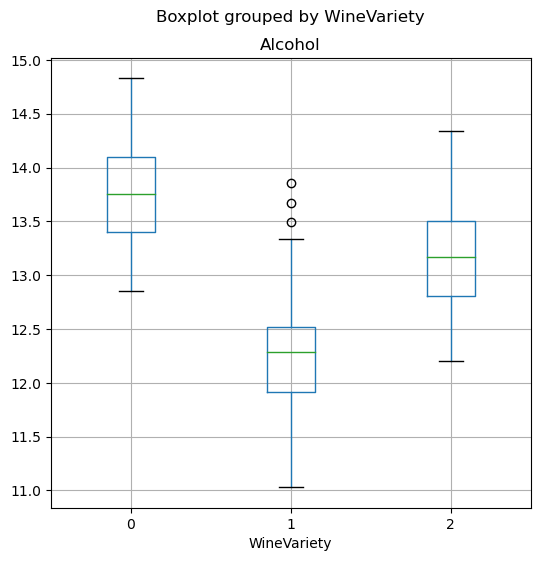

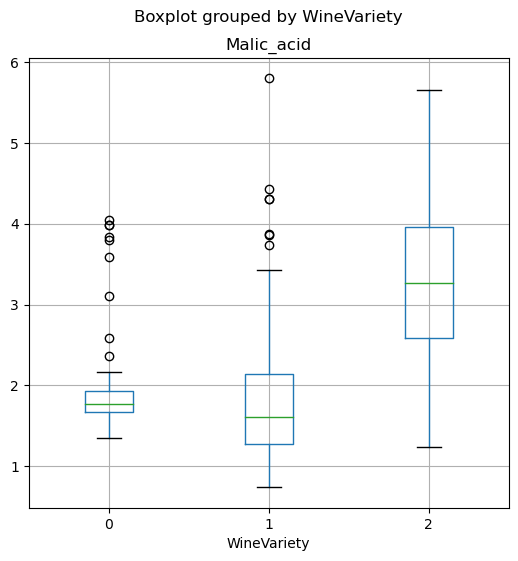

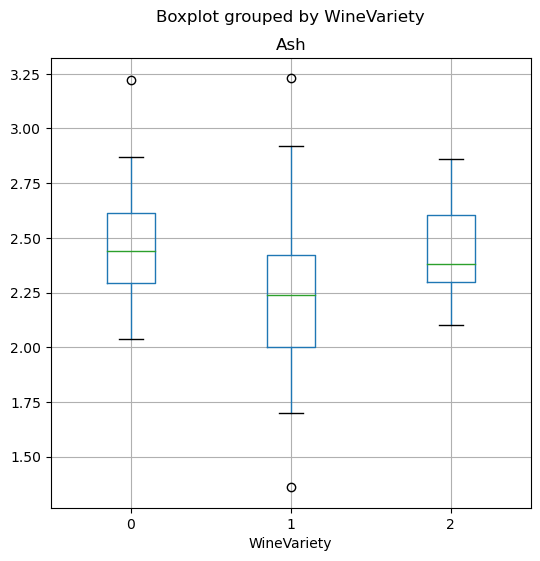

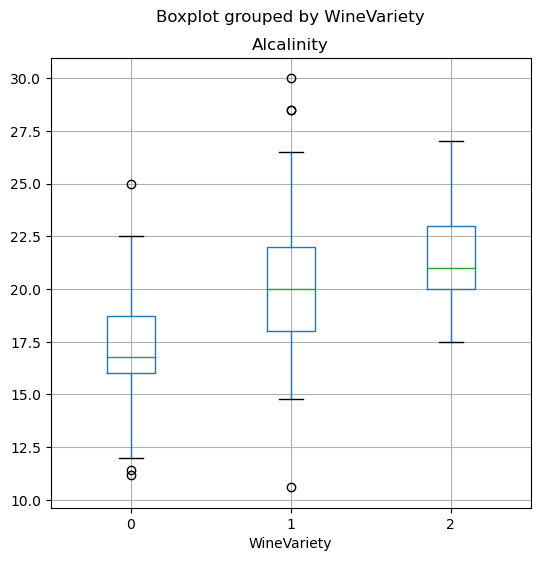

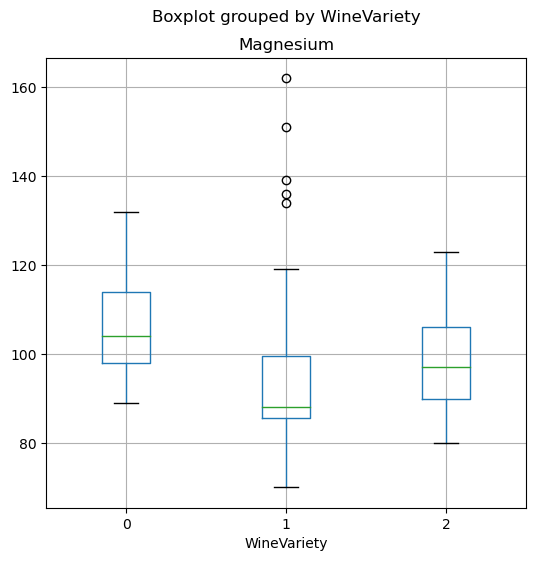

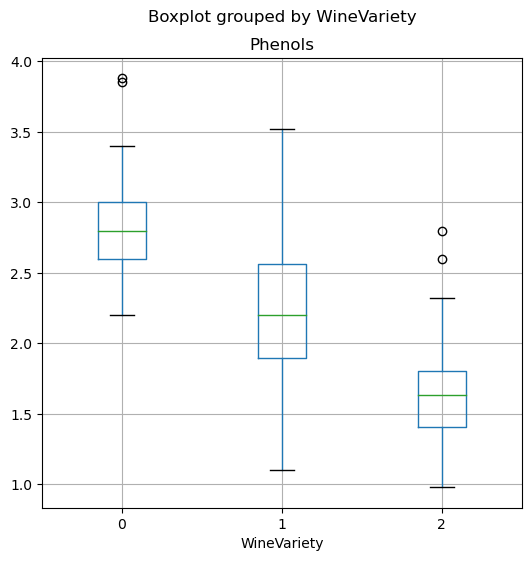

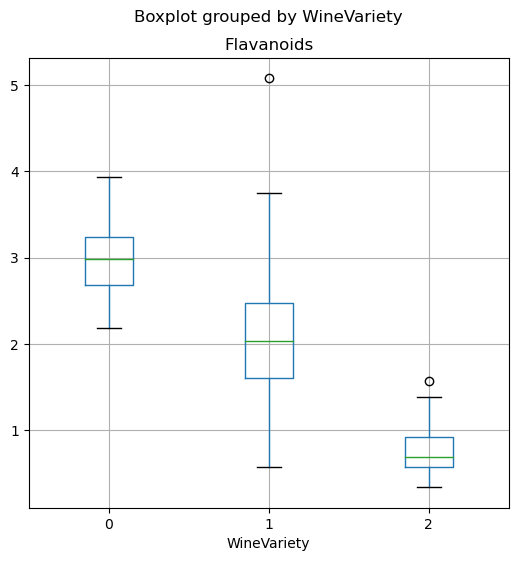

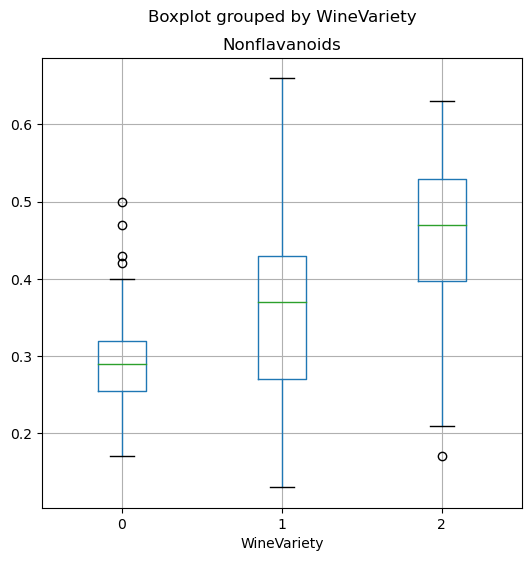

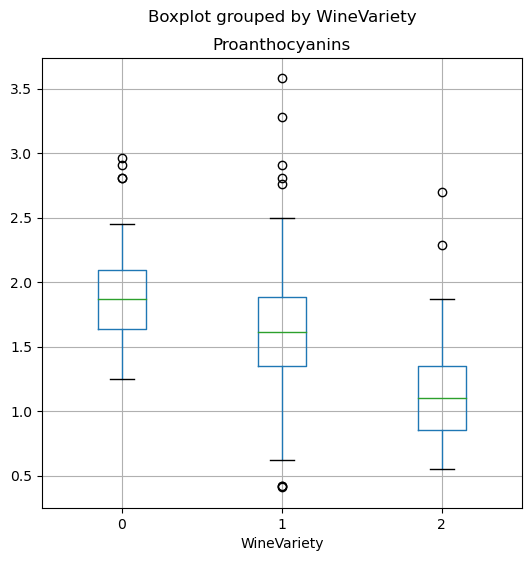

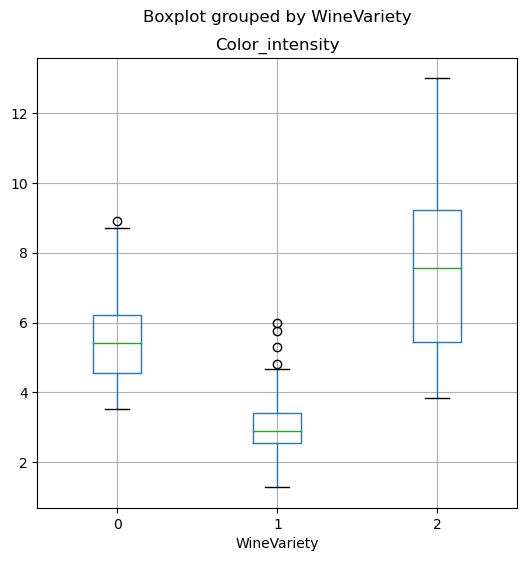

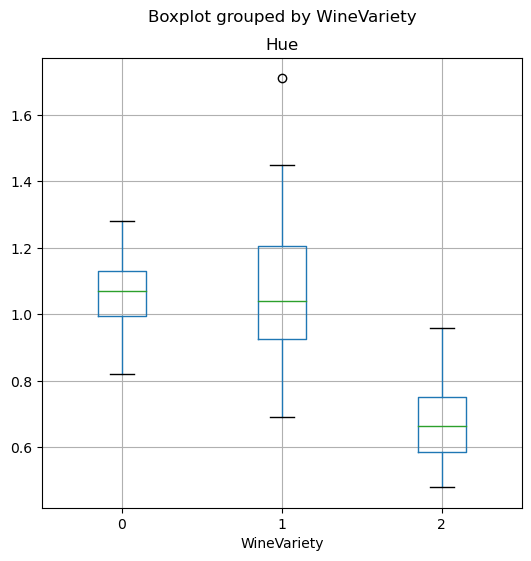

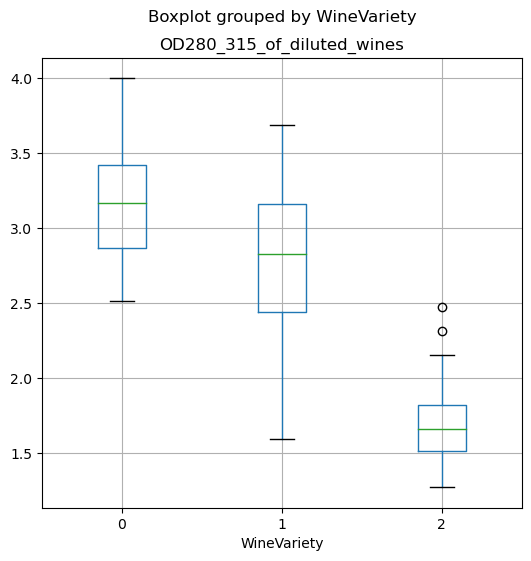

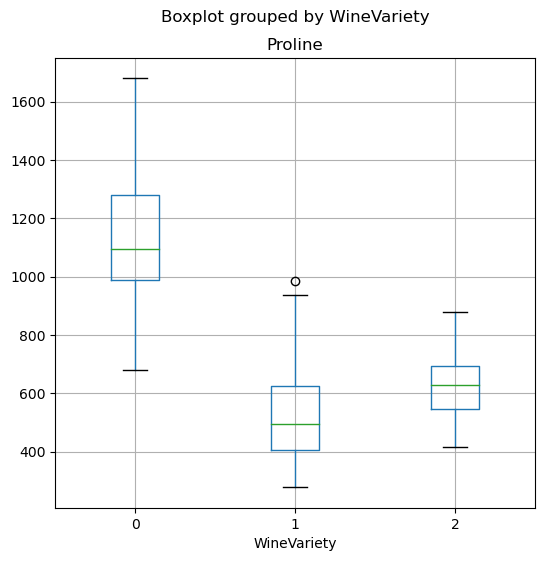

In [4]:
# Menampilkan boxplot features 
import matplotlib.pyplot as plt
%matplotlib inline

features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_315_of_diluted_wines', 'Proline']
for col in features:
    grape_variety.boxplot(column=col, by='WineVariety', figsize=(6,6))
    plt.title(col)
plt.show()

### Split The Data 

In [5]:
from sklearn.model_selection import train_test_split

# Memisahkan data 70% - 30% ke dalam set pelatihan dan uji test
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.30, random_state=0)
print('Training Cases: %d\nTest Cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training Cases: 124
Test Cases: 54


### Train and Evaluatee a Binary Classification Model

In [6]:
# melatih model
from sklearn.linear_model import LogisticRegression

# Menentukan nilai regulasi
reg = 0.01

# Melatoih model logistik regresi
model = LogisticRegression(C=1/reg, solver='liblinear').fit(X_train, y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')


In [7]:
predictions = model.predict(X_test)
print('Predict Labels:', predictions)
print('Actual:', y_test)

Predict Labels: [0 2 1 0 1 0 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 0 1 1 1 1 1 0 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2]
Actual: [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2]


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9444444444444444


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



In [10]:
from sklearn.metrics import precision_score, recall_score

print('Overall Precision: ', precision_score(y_test, predictions, pos_label='positive', average='micro'))
print('Overall Recall : ', recall_score(y_test, predictions, pos_label='positive', average='micro'))

Overall Precision:  0.9444444444444444
Overall Recall :  0.9444444444444444


C:\Users\restu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\restu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [11]:
from sklearn.metrics import confusion_matrix

# Melatih model
cm = confusion_matrix(y_test, predictions)
print(cm)

[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]


In [12]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[9.99851831e-01 1.25302359e-10 1.48168612e-04]
 [6.38762090e-08 7.99628700e-20 9.99999936e-01]
 [2.13554732e-08 9.99999938e-01 4.05688670e-08]
 [9.99922573e-01 2.11480447e-09 7.74246834e-05]
 [4.69266929e-07 9.99999398e-01 1.32577266e-07]
 [9.99951248e-01 4.87486617e-05 3.02686160e-09]
 [9.99911605e-01 6.10154465e-14 8.83954920e-05]
 [9.71337726e-08 2.31428834e-12 9.99999903e-01]
 [3.88541008e-06 9.99995145e-01 9.69708863e-07]
 [1.37812803e-07 9.99986854e-01 1.30078652e-05]
 [1.38630540e-03 2.11894648e-08 9.98613673e-01]
 [1.58069196e-09 3.30388221e-02 9.66961176e-01]
 [9.99940525e-01 2.43123836e-17 5.94752155e-05]
 [1.03356566e-02 9.89664340e-01 3.23276948e-09]
 [1.55218575e-07 6.20552258e-14 9.99999845e-01]
 [8.89676985e-11 9.99999981e-01 1.84297098e-08]
 [9.99643752e-01 7.35366968e-13 3.56248305e-04]
 [9.99365806e-01 6.19879992e-26 6.34194228e-04]
 [2.99156615e-07 4.94801442e-03 9.95051686e-01]
 [9.99999596e-01 7.29515087e-10 4.03140940e-07]
 [2.89632330e-07 9.99999684e-01 2.672531

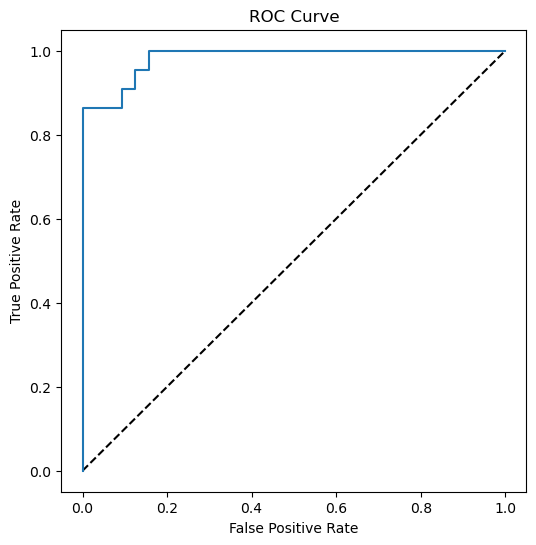

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Menkalkulasikan kurva ROC
fpr, tpr, trashold = roc_curve(y_test, y_scores[:,1], pos_label=1)

# Membuat plot kurva ROC
fig = plt.figure(figsize=(6,6))

# Membuat plot nilai diagonal 50% satu baris
plt.plot([0,1], [0,1], 'k--')

# Membuat plot tengan FPR dan TPR simpanan model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score

y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_scores, multi_class='ovr')
print('AUC: ', auc)

AUC:  0.985548603087114


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 124
Test cases: 54


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import  Pipeline
from sklearn.linear_model import LogisticRegression

# Definisi pemrosessan untuk nilai di kolom numeric (scale them)
feature_columns = [1, 2, 3, 4, 5, 6]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Membuat Tahap Pemrosessan
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocessor', feature_transformer, feature_columns)])

# Membuat alur data latih
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])

# Mengklasifikasikan alur data untuk dilatih menggunakan model regressi linear
model = pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocessor',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5, 6])])),
                ('regressor', LogisticRegression())])


### Evaluate Model

Overall Accuracy: 0.9074074074074074
Overall Precision: 0.9244851258581236
Overall Recall: 0.9137529137529139


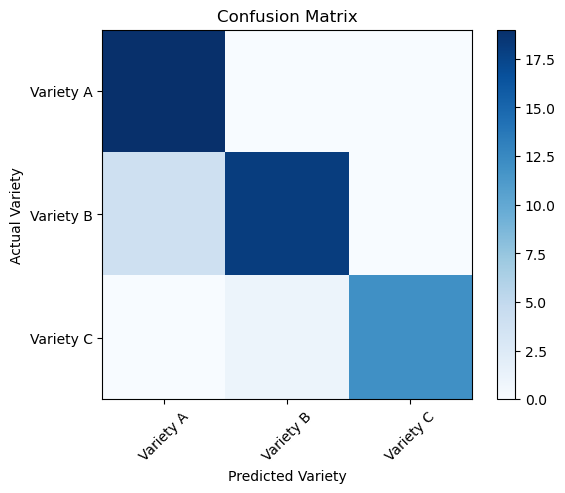

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Mendapatkan Nilai Prediksi dari datatest
predictions = model.predict(X_test)

# Mendapatkan nilai matriks
print('Overall Accuracy:', accuracy_score(y_test, predictions))
print('Overall Precision:', precision_score(y_test, predictions, average='macro'))
print('Overall Recall:', recall_score(y_test, predictions, average='macro'))

# Membuat Plot Confusion Matrix
cm = confusion_matrix(y_test, predictions)
classes = ['Variety A', 'Variety B', 'Variety C']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Variety')
plt.ylabel('Actual Variety')
plt.show()

Average AUC: 0.9807551549327865


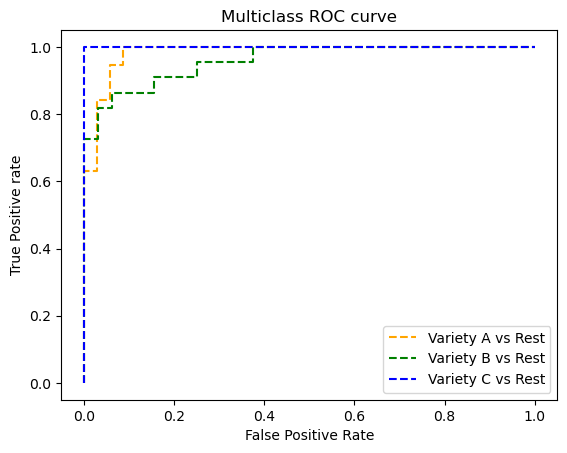

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [38]:
import joblib

# Menyimpan Model kedalam file pickle
filename = './wine_classifier.pkl'
joblib.dump(model, filename)

# Memuat model yang disimpan
model = joblib.load(filename)

# Get predictions for two new wine sample
X_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Memanggil layanan web melewati input
predictions = model.predict(X_new)

# Mendapatkan nilai class prediksi
for prediction in predictions:
    print(prediction, '(' + classes[prediction] + ')')

0 (Variety A)
1 (Variety B)
